# Разглеждане на дейтасета Homicide Reports, 1980-2014

[Линк към дейтасета](https://www.kaggle.com/murderaccountability/homicide-reports/data)

## Зареждане на необходимите библиотеки

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
import matplotlib as mpl

from sklearn.linear_model import Lasso, LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

from sklearn.svm import SVC

from sklearn.preprocessing import \
    Imputer, \
    LabelBinarizer, \
    StandardScaler, \
    PolynomialFeatures

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

from IPython.display import display

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()
mpl.style.use('fivethirtyeight')

# Зареждане и разглеждане на дейтасета

Дейтасета беше намален (за да може да се пушне в гитхъб).

In [94]:
data = pd.read_csv('data/reduced-homicide.csv')

In [95]:
data.sample(10)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
212036,212037,NY03030,New York,Municipal Police,New York,New York,1990,May,47,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
227523,227524,ILCPD00,Chicago,Municipal Police,Cook,Illinois,1991,July,71,Murder or Manslaughter,...,Unknown,Female,28,Black,Unknown,Acquaintance,Knife,0,0,FBI
257430,257431,NY00701,Elmira,Municipal Police,Chemung,New York,1992,April,4,Murder or Manslaughter,...,Unknown,Female,25,White,Unknown,Acquaintance,Knife,0,0,FBI
160418,160419,AR05001,Prescott,Municipal Police,Nevada,Arkansas,1988,July,1,Murder or Manslaughter,...,Unknown,Male,22,Black,Unknown,Stranger,Handgun,0,0,FBI
17107,17108,OHCLP00,Cleveland,Municipal Police,Cuyahoga,Ohio,1980,March,17,Murder or Manslaughter,...,Not Hispanic,Female,27,White,Not Hispanic,Acquaintance,Handgun,0,0,FBI
204729,204730,GA12101,Augusta,Municipal Police,Richmond,Georgia,1990,November,1,Murder or Manslaughter,...,Unknown,Male,18,Black,Unknown,Acquaintance,Handgun,0,0,FBI
260047,260048,OH05009,Youngstown,Municipal Police,Mahoning,Ohio,1992,July,1,Murder or Manslaughter,...,Unknown,Male,26,White,Unknown,Father,Blunt Object,0,0,FBI
78127,78128,NY03030,New York,Municipal Police,New York,New York,1983,September,86,Murder or Manslaughter,...,Unknown,Male,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
9721,9722,LA00901,Shreveport,Municipal Police,Caddo,Louisiana,1980,April,2,Murder or Manslaughter,...,Not Hispanic,Male,36,Black,Not Hispanic,Stranger,Shotgun,0,0,FBI
182035,182036,CA03300,Riverside,Sheriff,Riverside,California,1989,July,7,Murder or Manslaughter,...,Hispanic,Male,16,Black,Not Hispanic,Neighbor,Rifle,0,1,FBI


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271688 entries, 0 to 271687
Data columns (total 24 columns):
Record ID                271688 non-null int64
Agency Code              271688 non-null object
Agency Name              271688 non-null object
Agency Type              271688 non-null object
City                     271688 non-null object
State                    271688 non-null object
Year                     271688 non-null int64
Month                    271688 non-null object
Incident                 271688 non-null int64
Crime Type               271688 non-null object
Crime Solved             271688 non-null object
Victim Sex               271688 non-null object
Victim Age               271688 non-null int64
Victim Race              271688 non-null object
Victim Ethnicity         271688 non-null object
Perpetrator Sex          271688 non-null object
Perpetrator Age          271688 non-null int64
Perpetrator Race         271688 non-null object
Perpetrator Ethnicity    27168

In [97]:
data.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000
mean,135844.500000,1986.202070,14.074821,34.991126,21.224485,0.109258,0.152204
std,78429.714305,3.955108,27.925836,34.615699,17.681596,0.522305,0.500178
min,1.000000,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,67922.750000,1983.000000,1.000000,23.000000,0.000000,0.000000,0.000000
50%,135844.500000,1986.000000,2.000000,30.000000,22.000000,0.000000,0.000000
75%,203766.250000,1990.000000,12.000000,41.000000,32.000000,0.000000,0.000000
max,271688.000000,1993.000000,994.000000,998.000000,99.000000,10.000000,10.000000


In [98]:
data.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

Нямаме празни полета, супер.

## Нека първо да дефинираме малко helper функции

In [99]:
def line_plot(data, title='Title'):
    plt.rcParams['figure.figsize'] = (15, 4)
    for line in data:
        plt.plot(line.value_counts().sort_index(ascending=True))
    plt.title(title)

In [114]:
def count_plot(data, title='Title'):
    plt.rcParams['figure.figsize'] = (15,4)
    data.value_counts().plot(kind='bar')
    plt.title(title)

In [101]:
def goup_by_plot(data, what, group_prop):
    data[what].groupby(data[group_prop]).size().plot(kind='bar')

In [118]:
def hist(data, prop_name, title='Title'):
    plt.hist(x=prop_name, data=data)
    plt.xlabel(prop_name)
    plt.ylabel('Frequency')
    plt.title(title)

In [137]:
def plot_heatmap(data, row, col):
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.crosstab(data[row], data[col]))

In [141]:
def corr_map(data_frame):
    plt.figure(figsize=(14, 12))
    plt.title('Correlation of features', y=1.05, size=15)
    sns.set(font_scale=0.8)
    sns.heatmap(data_frame.astype(float).corr(), square=True, annot=True, cmap=plt.cm.viridis_r)

---

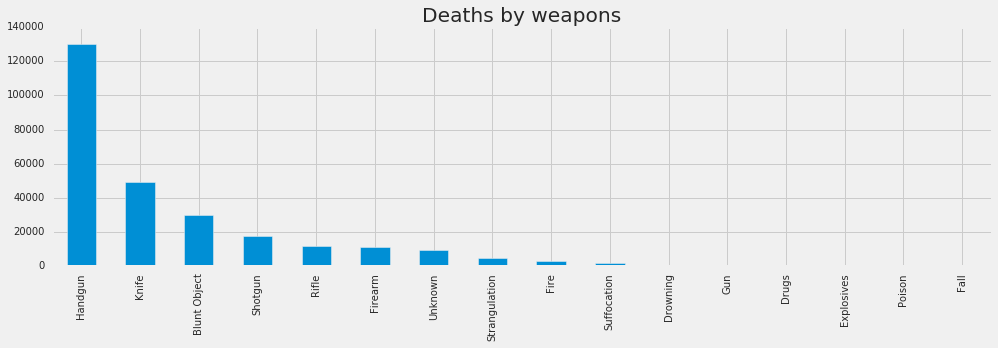

In [102]:
count_plot(data['Weapon'], 'Deaths by weapons')

Ръчният пистолет е доста популярен избор.

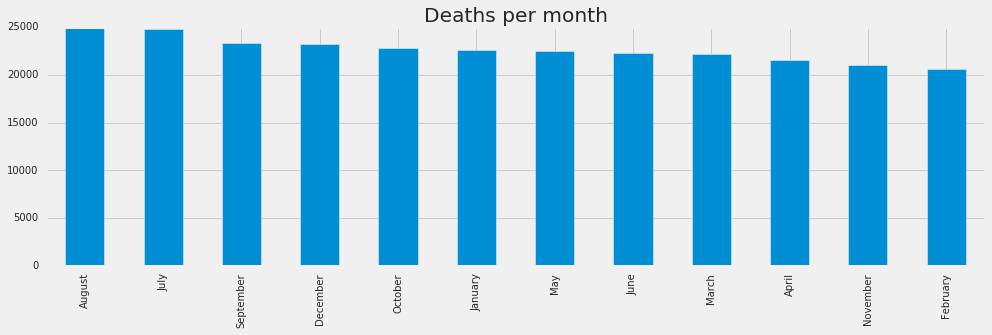

In [103]:
count_plot(data['Month'], 'Deaths per month')

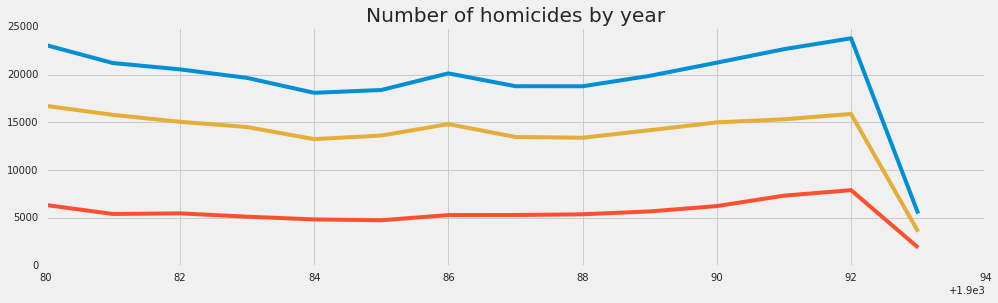

In [104]:
unsolved_crimes = data[data["Crime Solved"] != "Yes"]
solved_crimes = data[data["Crime Solved"] == "Yes"]

line_plot([data['Year'], unsolved_crimes['Year'], solved_crimes['Year']], 'Number of homicides by year')

In [105]:
solved_crimes.sample(5)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
160045,160046,AL00201,Mobile,Municipal Police,Mobile,Alabama,1988,January,3,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Neighbor,Handgun,0,0,FBI
116514,116515,PA016SP,State Police: Clarion County,State Police,Clarion,Pennsylvania,1985,November,1,Murder or Manslaughter,...,Not Hispanic,Male,61,White,Not Hispanic,Acquaintance,Handgun,0,0,FBI
231524,231525,MS02402,Gulfport,Municipal Police,Harrison,Mississippi,1991,April,1,Murder or Manslaughter,...,Unknown,Male,22,Black,Unknown,Unknown,Unknown,0,0,FBI
101,102,AL00102,Birmingham,Municipal Police,Jefferson,Alabama,1980,April,4,Murder or Manslaughter,...,Not Hispanic,Male,32,Black,Not Hispanic,Neighbor,Handgun,0,0,FBI
187384,187385,MD01721,Prince George's County,County Police,Prince George's,Maryland,1989,September,3,Murder or Manslaughter,...,Unknown,Male,19,Black,Unknown,Acquaintance,Handgun,0,1,FBI


In [106]:
print('Number of unsolved crimes', unsolved_crimes.shape[0])
print('Number of solved crimes', solved_crimes.shape[0])
print('Solved/unsolved ratio', solved_crimes.shape[0] / unsolved_crimes.shape[0])

Number of unsolved crimes 77102
Number of solved crimes 194586
Solved/unsolved ratio 2.5237477627039504


---

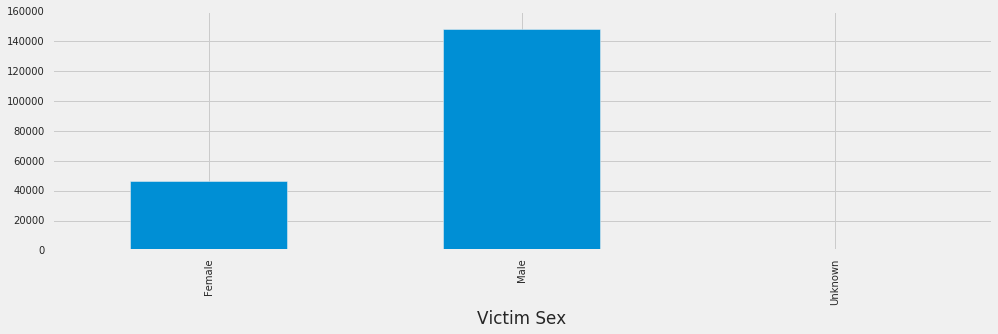

In [107]:
goup_by_plot(solved_crimes, 'Weapon', 'Victim Sex')

## Видове убийства

In [108]:
data["Crime Type"].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'], dtype=object)

In [113]:
manslaughter = data[data["Crime Type"] == "Murder or Manslaughter"]
manslaughter.head(5)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Брой убийства за определен щат.

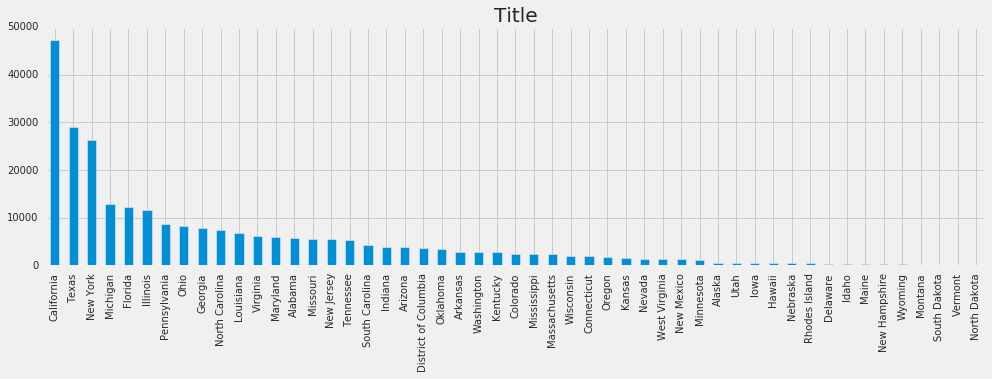

In [117]:
count_plot(manslaughter['State'])

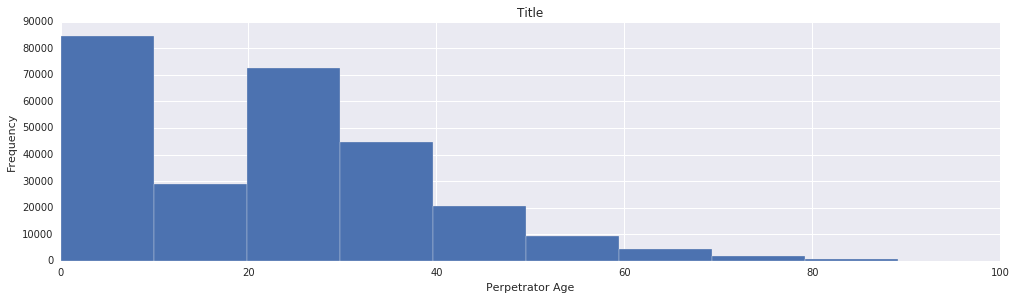

In [138]:
hist(manslaughter, 'Perpetrator Age')

Вероятността да извършиш престъпление намалява с възрастта.

---

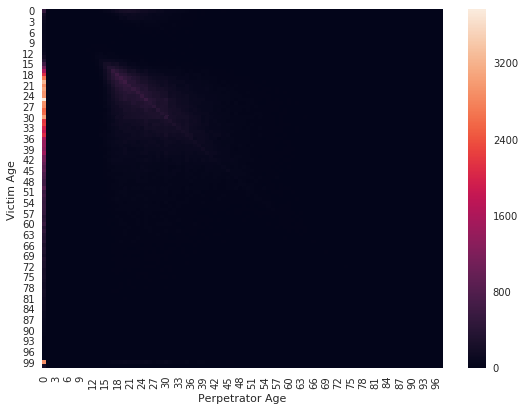

In [140]:
plot_heatmap(data, 'Victim Age', 'Perpetrator Age')

Хийт-мап на годините на извършителите и жертвите.

In [142]:
data.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000
mean,135844.500000,1986.202070,14.074821,34.991126,21.224485,0.109258,0.152204
std,78429.714305,3.955108,27.925836,34.615699,17.681596,0.522305,0.500178
min,1.000000,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,67922.750000,1983.000000,1.000000,23.000000,0.000000,0.000000,0.000000
50%,135844.500000,1986.000000,2.000000,30.000000,22.000000,0.000000,0.000000
75%,203766.250000,1990.000000,12.000000,41.000000,32.000000,0.000000,0.000000
max,271688.000000,1993.000000,994.000000,998.000000,99.000000,10.000000,10.000000


Нека видим колко корелирани са част от данните.

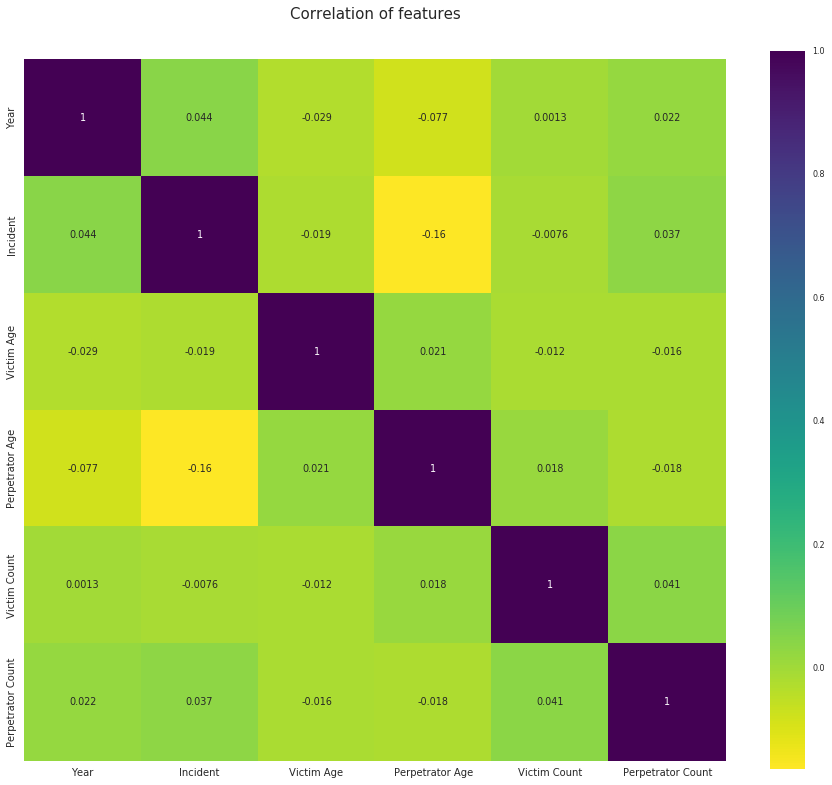

In [143]:
numeric_cols = ['Year', 'Incident', 'Victim Age', 'Perpetrator Age', 'Victim Count', 'Perpetrator Count']
corr_map(data[numeric_cols])

Не много I guess.

# THE END

![jontron](data/jontron-killer.jpg)